Code of Academic Integrity
* I affirm that
* This work is my own original work and is not a borrowed work,

*   This work is my own original work and is not a borrowed work, either from other students or from assignments for other courses.

*   I have not given or received any unauthorized help on this assignment.

*   This submission is free from Plagiarism, Fabrication of facts, Unauthorized assistance, collusion

*   This submission gives proper credit to sources and references, acknowledges the contributions and ideas of others relevant to this academic work.

*   This submission was prepared by me fully adhering to the rules that govern this assignment regarding resource material, electronic aids, copying, collaborating with others, or engaging in any other behavior that subverts the purpose of the assignment and the directions of the teacher.



# **PAT 2**


### Question

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression

## Pulling the Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/D.csv", na_values=[" ","?","??","???","-"], index_col='S.no')

## 1. Data Preprocessing

### (a) Check the dimension and display the first 15 records of the dataset

In [ ]:
df.shape

(600, 13)

In [ ]:
df.ndim

2

In [ ]:
df.head(15)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,Target
S.no,,,,,,,,,,,,,
1,7420,4.0,2.0,3.0,1.0,2,2,no,1,2,yes,full,13300000
2,8960,4.0,4.0,4.0,1.0,2,2,no,1,3,no,full,12250000
3,9960,3.0,2.0,2.0,1.0,2,1,no,2,2,yes,semi,12250000
4,7500,4.0,2.0,2.0,1.0,2,1,no,1,3,yes,full,12215000
5,7420,4.0,1.0,2.0,1.0,1,1,no,1,2,no,full,11410000
6,7500,3.0,3.0,1.0,1.0,2,1,no,1,2,yes,semi,10850000
7,8580,4.0,3.0,4.0,1.0,2,2,no,1,2,yes,semi,10150000
8,162000,5.0,3.0,2.0,1.0,2,2,no,2,0,no,empty,10150000
9,8100,4.0,1.0,2.0,1.0,1,1,no,1,2,yes,full,9870000


### (b) Identify the attribres which are categorical and continous

In [ ]:
def uprint(df, name):
  print("column name: ", name ,df[name].unique())

In [ ]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'Target'],
      dtype='object')

In [ ]:
for column in df.columns:
  uprint(df, column)

column name:  A1 [  7420   8960   9960   7500   8580 162000   8100   5750  13200   6000
   6550   3500   7800   6600   8500   4600   6420   4320   7155   8050
   4560   8800   6540   8875   7950   5500   7475   7000   4880   5960
   6840   7482   9000   6360   6480   4300   7440   6325   5150  11440
   7680   8880   6240  11175   7700  12090   4000   5020   4040   4260
   6500   5700  10500   3760   8250   6670   3960   7410   5000   6750
   4800   7200   4100   6400   6350   4500   5450   3240   6615   8372
   9620   6800   8000   6900   3700   7020   7231   6254   7320   6525
  15600   7160  11460   5828   5200   5400   4640   5800   6660   4700
   5136   4400   3300   3650   6100   2817   7980   3150   6210   6825
   6710   6450  10269   8400   5300   3800   9800   8520   6050   7085
   3180   3410   3000  11410   5720   3540   7600  10700   8150   4410
   7686   2800   5948   4200   4520   4095   4120   4770   6300   2970
   6720   4646  12900   3420   4995   4350   4160   6040   6

In [ ]:
df.dtypes

A1          int64
A2        float64
A3        float64
A4        float64
A5        float64
A6          int64
A7         object
A8         object
A9          int64
A10         int64
A11        object
A12        object
Target      int64
dtype: object

Here, Columns S.no, A1 and Target are continuous all other columns i.e. columns A2 - A12 are all categorical.

### (c) Make the scatter plot for any two input attributes vs output attribute and write down your inferences hased on the scatterplots 

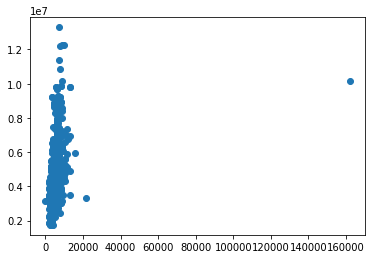

In [ ]:
plt.scatter(df.A1, df.Target)

Inference: Here one value of A1 that is near 160000 is an outlier.

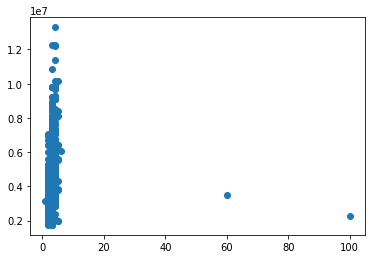

In [ ]:
plt.scatter(df.A2, df.Target)

Inference: Here two values of of A2 i.e. 60 and 100 are outliers.

### (d) Identify the NAN values in each of the input, output the number of NaN values in each of the input attributes

In [ ]:
pd.isna(df)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,Target
S.no,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,False,False,False,False,False,False,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False,False,False,False,False,False,False
598,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.isna(df).sum()

A1        0
A2        4
A3        2
A4        2
A5        2
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       3
Target    0
dtype: int64

Inference: The values which were nan were ?, ??, ???, " ", -, and were converted to nan values while reading the csv file

### (e) Do the imputations be replacing all the NaN values in an attribute with the mean of all the values of that attribute or mode of all the values of that attribute. 

In [ ]:
def meanchange(df, name):
  mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
  df[name] = mean_imputer.fit_transform(df[name].values.reshape(-1,1))[:,0]
  return df
def modechange(df, name):
  mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  df[name] = mode_imputer.fit_transform(df[name].values.reshape(-1,1))[:,0]
  return df

In [ ]:
names = ['A2', 'A3', 'A4', 'A5', 'A12']
for name in names:
  df = modechange(df, name)

In [ ]:
pd.isna(df).sum()

A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
Target    0
dtype: int64

### (f) Identify the outliers in each of the attribute and replace the outlares wing the capping process

In [ ]:
def remove_outlier(df, cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    iqr = Q3-Q1
    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr
    df[cname]=np.where(
        df[cname]>upper_limit,
        upper_limit,
        np.where(
            df[cname]<lower_limit,
            lower_limit,
            df[cname]
        )
    )
    print(df[cname].skew())
    return df

In [ ]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'Target'],
      dtype='object')

In [ ]:
colummns = ['A1', 'Target']
for columns in colummns:
  df = remove_outlier(df, columns)

0.7869643682416831
0.8590869778786708


In [ ]:
for column in df.columns:
  uprint(df, column)

column name:  A1 [ 7420.  8960.  9960.  7500.  8580. 10650.  8100.  5750.  6000.  6550.
  3500.  7800.  6600.  8500.  4600.  6420.  4320.  7155.  8050.  4560.
  8800.  6540.  8875.  7950.  5500.  7475.  7000.  4880.  5960.  6840.
  7482.  9000.  6360.  6480.  4300.  7440.  6325.  5150.  7680.  8880.
  6240.  7700.  4000.  5020.  4040.  4260.  6500.  5700. 10500.  3760.
  8250.  6670.  3960.  7410.  5000.  6750.  4800.  7200.  4100.  6400.
  6350.  4500.  5450.  3240.  6615.  8372.  9620.  6800.  8000.  6900.
  3700.  7020.  7231.  6254.  7320.  6525.  7160.  5828.  5200.  5400.
  4640.  5800.  6660.  4700.  5136.  4400.  3300.  3650.  6100.  2817.
  7980.  3150.  6210.  6825.  6710.  6450. 10269.  8400.  5300.  3800.
  9800.  8520.  6050.  7085.  3180.  3410.  3000.  5720.  3540.  7600.
  8150.  4410.  7686.  2800.  5948.  4200.  4520.  4095.  4120.  4770.
  6300.  2970.  6720.  4646.  3420.  4995.  4350.  4160.  6040.  6862.
  4815.  9166.  6321. 10240.  6440.  5170.  3630.  9667.  37

### (g) Identify the attributes which have ordinal values and encode them appropriately.

In [ ]:
def LEncoder(df, cname):
  le_encoder = LabelEncoder()
  le_encoder.fit(df[cname].drop_duplicates())
  df[cname] = le_encoder.transform(df[cname])
  return df

In [ ]:
df.loc[df.A7 == 'two', 'A7'] = 2

In [ ]:
df.A7.unique()

array(['2', '1', 2], dtype=object)

In [ ]:
columns = ['A2','A8','A11','A12']
for column in columns:
  df = LEncoder(df, column)

In [ ]:
df.A7 = df.A7.astype(int)

In [ ]:
for column in df.columns:
  uprint(df, column)

column name:  A1 [ 7420.  8960.  9960.  7500.  8580. 10650.  8100.  5750.  6000.  6550.
  3500.  7800.  6600.  8500.  4600.  6420.  4320.  7155.  8050.  4560.
  8800.  6540.  8875.  7950.  5500.  7475.  7000.  4880.  5960.  6840.
  7482.  9000.  6360.  6480.  4300.  7440.  6325.  5150.  7680.  8880.
  6240.  7700.  4000.  5020.  4040.  4260.  6500.  5700. 10500.  3760.
  8250.  6670.  3960.  7410.  5000.  6750.  4800.  7200.  4100.  6400.
  6350.  4500.  5450.  3240.  6615.  8372.  9620.  6800.  8000.  6900.
  3700.  7020.  7231.  6254.  7320.  6525.  7160.  5828.  5200.  5400.
  4640.  5800.  6660.  4700.  5136.  4400.  3300.  3650.  6100.  2817.
  7980.  3150.  6210.  6825.  6710.  6450. 10269.  8400.  5300.  3800.
  9800.  8520.  6050.  7085.  3180.  3410.  3000.  5720.  3540.  7600.
  8150.  4410.  7686.  2800.  5948.  4200.  4520.  4095.  4120.  4770.
  6300.  2970.  6720.  4646.  3420.  4995.  4350.  4160.  6040.  6862.
  4815.  9166.  6321. 10240.  6440.  5170.  3630.  9667.  37

A7 has 'two' changing it

## 2. Training the models

In [ ]:
class sgd_regressor:

  def __init__(self,X):    
    self.W = np.random.randn(X.shape[1],1)    
    

  def fit(self,X, y, learning_rate=0.1, numEpochs=2000):
    num_of_samples = len(X)
    xbShuffled, yShuffled = shuffle(X, y)
    for epoch in range(numEpochs):
      
      for i in range(num_of_samples):        
        X = xbShuffled[i:i+1]
        yi = yShuffled[i:i+1]
        
        delta = X.T.dot(X.dot(self.W)-yi.reshape(-1,1))
                
        self.W = self.W - learning_rate * delta
      learning_rate = learning_rate/1.02
    return self.W
    
  def predict(self,X,W):
    return X.dot(W)

  def measure(self,y_predict,y_actual):
    return np.sqrt(mean_squared_error(y_predict, y_actual))

In [ ]:
def StoicGradientfunc(D, col, target, pre_arr):
  X_traind, X_testd, y_traind, y_testd = train_test_split(np.asarray(D[col]),D[target], test_size=0.25, random_state=4)
  
  scaler = MinMaxScaler(feature_range=(0,1))
  X_train = scaler.fit_transform(X_traind)
  X_test = scaler.transform(X_testd)
  
  X_train_b = np.asarray(X_train)
  Y_train = np.asarray(y_traind)
  X_test_b = np.asarray(X_test)
  sgd = sgd_regressor(X_train_b)
  
  w = sgd.fit(X_train_b,Y_train)
  predicted_train =sgd.predict(X_train_b,w)
  rmse_train = sgd.measure(predicted_train,Y_train)
  predicted_test =sgd.predict(X_test_b,w)
  predict = sgd.predict(pre_arr, w)
  rmse_test = sgd.measure(predicted_test,y_testd)
  return(rmse_train, rmse_test, predict)

### (a) With 75% of the dataset. Train a multiple lanear regression model with a polynomial of degree 1 (with all the terms) by considering all the input features of the dataset and recite the following experiments El, E2, E3


In [ ]:
predict_arr = pd.DataFrame([[3452,3,2,3,1,2,0,1,1,0,0,2],
                            [1343,2,4,4,2,2,0,1,1,0,0,2],
                            [5623,1,1,2,3,2,0,1,1,0,0,2],
                            [6321,7,3,1,2,0,1,1,0,0,2,3],
                            [8341,3,1,1,2,0,1,1,0,0,2,1],
                            [7321,5,3,2,2,0,1,1,0,0,2,1],
                            [9531,3,4,3,2,0,1,1,0,0,2,1],
                            [3563,6,2,4,2,0,1,1,0,0,2,1],
                            [1234,2,1,1,2,0,1,1,0,0,2,3],
                            [5321,5,1,2,1,0,1,1,0,0,2,1]])

In [ ]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'Target'],
      dtype='object')

In [ ]:
col = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12',]
kd, ld, E1 = StoicGradientfunc(df, col, 'Target' , predict_arr)
print('Training Mean Absolute Error', kd)
print('Test Mean Absolute Error', ld)
print('Predicted value is: \n', E1)

Training Mean Absolute Error 1010340.8238909416
Test Mean Absolute Error 1176203.9180383815
Predicted value is: 
               0
0  1.133057e+10
1  4.431896e+09
2  1.843566e+10
3  2.074111e+10
4  2.734503e+10
5  2.401719e+10
6  3.126518e+10
7  1.169978e+10
8  4.056046e+09
9  1.745159e+10


### (b) Batch Gradient Descent

In [ ]:
class batch_regressor:

  def __init__(self,X):    
    self.W = np.random.randn(X.shape[1],1)    
    

  def fit(self,X, y, learning_rate=0.1, numEpochs=2000):
    num_of_samples = len(X)    
    for epoch in range(numEpochs):      
      X, y = shuffle(X, y)
      delta = (X.T.dot(X.dot(self.W)-y.reshape(-1,1))/num_of_samples)        
      self.W = self.W - learning_rate * delta
      learning_rate = learning_rate/1.02
    
    return self.W
    
  def predict(self,X,W):
    return X.dot(W)

  def measure(self,y_predict,y_actual):
    return np.sqrt(mean_squared_error(y_predict, y_actual))

In [ ]:
def batch_gradient(D, col, target, pre_arr):
  X_traind, X_testd, y_traind, y_testd = train_test_split(np.asarray(D[col]),D[target], test_size=0.25, random_state=4)
  
  scaler = MinMaxScaler(feature_range=(0,1))
  X_train = scaler.fit_transform(X_traind)
  X_test = scaler.transform(X_testd)
  
  X_train_b = np.asarray(X_train)
  Y_train = np.asarray(y_traind)
  X_test_b = np.asarray(X_test)
  bgd = batch_regressor(X_train_b)
  
  w = bgd.fit(X_train_b,Y_train)
  predicted_train =bgd.predict(X_train_b,w)
  rmse_train = bgd.measure(predicted_train,Y_train)
  predicted_test =bgd.predict(X_test_b,w)
  rmse_test = bgd.measure(predicted_test,y_testd)
  print('SDE train Error', rmse_train)
  print('SDE test Error', rmse_test)
  per = (rmse_train+rmse_test)/2
  print('Performane', per)
  print('Prediction: \n',bgd.predict(pre_arr,w))
  print('\n')
  return(bgd.predict(pre_arr,w))

In [ ]:
col = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12',]
E2 = np.array(batch_gradient(df, col, 'Target' , predict_arr))

SDE train Error 1391587.1055696737
SDE test Error 1500005.3100854615
Performane 1445796.2078275676
Prediction: 
               0
0  6.916546e+09
1  2.703666e+09
2  1.125159e+10
3  1.265835e+10
4  1.668703e+10
5  1.465462e+10
6  1.907431e+10
7  7.143299e+09
8  2.479235e+09
9  1.065266e+10




### (c) Mini-batch gradient descent

In [ ]:
class mini_batch_regressor:

  def __init__(self,X):    
    self.W = np.random.randn(X.shape[1],1)    
    

  def fit(self,X, y, learning_rate=0.1, numEpochs=2000, batchsize=200):    
    num_of_samples = len(X)
    
    for epoch in range(numEpochs):
      xbShuffled, yShuffled = shuffle(X, y)
      for i in range(0,num_of_samples,batchsize):        
        X = xbShuffled[i:i+batchsize]
        y = yShuffled[i:i+batchsize]
        if len(X)<batchsize:
          break        
        delta = 1/batchsize*X.T.dot(X.dot(self.W)-y.reshape(-1,1))                        
              
        self.W = self.W - learning_rate * delta    
      learning_rate = learning_rate/1.02  
    return self.W
    
  def predict(self,X,W):
    return X.dot(W)

  def measure(self,y_predict,y_actual):
    return np.sqrt(mean_squared_error(y_predict, y_actual))

In [ ]:
def minibatch_gradient(D, col, target, pre_arr):
  X_traind, X_testd, y_traind, y_testd = train_test_split(np.asarray(D[col]),D[target], test_size=0.25, random_state=4)

  scaler = MinMaxScaler(feature_range=(0,1))
  X_train = scaler.fit_transform(X_traind)
  X_test = scaler.transform(X_testd)

  X_train_b = np.asarray(X_train)
  Y_train = np.asarray(y_traind)
  X_test_b = np.asarray(X_test)
  mgd = mini_batch_regressor(X_train_b)

  w = mgd.fit(X_train_b,Y_train)
  predicted_train =mgd.predict(X_train_b,w)
  rmse_train = mgd.measure(predicted_train,Y_train)
  predicted_test =mgd.predict(X_test_b,w)
  rmse_test = mgd.measure(predicted_test,y_testd)
  print('SDE train Error', rmse_train)
  print('SDE test Error', rmse_test)
  per = (rmse_train+rmse_test)/2
  print('Performane', per)
  print('Prediction: \n',mgd.predict(pre_arr,w))
  print('\n')
  return(mgd.predict(pre_arr,w))

In [ ]:
col = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12',]
E3 = np.array(minibatch_gradient(df, col, 'Target' , predict_arr))

SDE train Error 3325503.857597593
SDE test Error 3338726.7473603343
Performane 3332115.3024789635
Prediction: 
               0
0  1.512043e+09
1  5.923461e+08
2  2.458724e+09
3  2.765082e+09
4  3.644092e+09
5  3.200419e+09
6  4.165302e+09
7  1.560387e+09
8  5.424784e+08
9  2.326496e+09




### (d) quartile and stufff

In [ ]:
D = df.copy()

In [ ]:
iq1 = df['Target'].quantile(0.25)
iq2 = df['Target'].quantile(0.5)
iq3 = df['Target'].quantile(0.75)

In [ ]:
#df.loc[boolean_condition, column_name] = new_value
D.loc[df.Target <= iq1, 'Target'] = 'Label A'
D.loc[np.logical_and(df.Target > iq1 , df.Target <= iq2), 'Target'] = 'Label B'
D.loc[np.logical_and(df.Target > iq2 , df.Target <= iq3), 'Target'] = 'Label C'
D.loc[df.Target >= iq3 , 'Target'] = 'Label D'

In [ ]:
D

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,Target
S.no,,,,,,,,,,,,,
1,7420.0,3,2.0,3.0,1.0,2,2,0,1,2,1,1,Label D
2,8960.0,3,4.0,4.0,1.0,2,2,0,1,3,0,1,Label D
3,9960.0,2,2.0,2.0,1.0,2,1,0,2,2,1,2,Label D
4,7500.0,3,2.0,2.0,1.0,2,1,0,1,3,1,1,Label D
5,7420.0,3,1.0,2.0,1.0,1,1,0,1,2,0,1,Label D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,6600.0,2,2.0,1.0,1.0,2,1,0,1,0,1,0,Label D
597,5500.0,2,1.0,3.0,1.0,2,2,0,2,1,1,0,Label D
598,6600.0,3,2.0,1.0,1.0,2,1,0,2,0,1,2,Label C


In [ ]:
E4 = np.array(D['Target'])
E4

array(['Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label D', 'Label D', 

### (e)

In [ ]:
X=D.drop(['Target'], axis=1)

In [ ]:
Y=D['Target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25,random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(C=10, max_iter=100, solver='liblinear',tol=0.001,random_state=0)

In [ ]:
logit_model.fit(X_train, Y_train)

LogisticRegression(C=10, random_state=0, solver='liblinear', tol=0.001)

In [ ]:
logit_model.score(X_test, Y_test)

0.31333333333333335

In [ ]:
predictions=logit_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, predictions)

array([[ 0,  0, 42,  3],
       [ 0,  0, 37,  3],
       [ 0,  0, 19, 14],
       [ 0,  0,  4, 28]])

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

     Label A       0.00      0.00      0.00        45
     Label B       0.00      0.00      0.00        40
     Label C       0.19      0.58      0.28        33
     Label D       0.58      0.88      0.70        32

    accuracy                           0.31       150
   macro avg       0.19      0.36      0.25       150
weighted avg       0.17      0.31      0.21       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
E5 = logit_model.predict(predict_arr)
E5

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['Label D', 'Label C', 'Label C', 'Label D', 'Label D', 'Label D',
       'Label D', 'Label D', 'Label C', 'Label D'], dtype=object)

### (vi)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
# maximum depth of decision trees is 9
clf_tree=DecisionTreeClassifier(criterion="entropy", random_state=0,max_depth=9)

In [ ]:
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

In [ ]:
Y_Pred=clf_tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
report=classification_report(Y_Pred, Y_test)

In [ ]:
print(report)

              precision    recall  f1-score   support

     Label A       0.78      0.70      0.74        50
     Label B       0.35      0.39      0.37        36
     Label C       0.33      0.41      0.37        27
     Label D       0.75      0.65      0.70        37

    accuracy                           0.56       150
   macro avg       0.55      0.54      0.54       150
weighted avg       0.59      0.56      0.57       150



In [ ]:
clf_tree.score(X_test, Y_test)

0.56

In [ ]:
E6 = clf_tree.predict(predict_arr)
E6

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Label B', 'Label B', 'Label C', 'Label C', 'Label C', 'Label D',
       'Label D', 'Label C', 'Label C', 'Label A'], dtype=object)

### (vii) Create a new data frame D2 based on the outputs of E1, E2,E3,E4,E5,E6,E7.

In [ ]:
D2s1 = predict_arr.rename(columns = {0: 'A1', 1: 'A2',2: 'A3',3: 'A4',4: 'A5',5: 'A6',6: 'A7',7: 'A8',8: 'A9',9: 'A10',10: 'A11',11: 'A12'}, inplace = False)
D2s1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12
0,3452,3,2,3,1,2,0,1,1,0,0,2
1,1343,2,4,4,2,2,0,1,1,0,0,2
2,5623,1,1,2,3,2,0,1,1,0,0,2
3,6321,7,3,1,2,0,1,1,0,0,2,3
4,8341,3,1,1,2,0,1,1,0,0,2,1
5,7321,5,3,2,2,0,1,1,0,0,2,1
6,9531,3,4,3,2,0,1,1,0,0,2,1
7,3563,6,2,4,2,0,1,1,0,0,2,1
8,1234,2,1,1,2,0,1,1,0,0,2,3
9,5321,5,1,2,1,0,1,1,0,0,2,1


In [ ]:
D2s1["E1"]=E1
D2s1["E2"]=E2
D2s1["E3"]=E3
D2s1["E5"]=E5
D2s1["E6"]=E6
D2s1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,E1,E2,E3,E5,E6
0,3452,3,2,3,1,2,0,1,1,0,0,2,1.133057e+10,6.916546e+09,1.512043e+09,Label D,Label B
1,1343,2,4,4,2,2,0,1,1,0,0,2,4.431896e+09,2.703666e+09,5.923461e+08,Label C,Label B
2,5623,1,1,2,3,2,0,1,1,0,0,2,1.843566e+10,1.125159e+10,2.458724e+09,Label C,Label C
3,6321,7,3,1,2,0,1,1,0,0,2,3,2.074111e+10,1.265835e+10,2.765082e+09,Label D,Label C
4,8341,3,1,1,2,0,1,1,0,0,2,1,2.734503e+10,1.668703e+10,3.644092e+09,Label D,Label C
5,7321,5,3,2,2,0,1,1,0,0,2,1,2.401719e+10,1.465462e+10,3.200419e+09,Label D,Label D
6,9531,3,4,3,2,0,1,1,0,0,2,1,3.126518e+10,1.907431e+10,4.165302e+09,Label D,Label D
7,3563,6,2,4,2,0,1,1,0,0,2,1,1.169978e+10,7.143299e+09,1.560387e+09,Label D,Label C
8,1234,2,1,1,2,0,1,1,0,0,2,3,4.056046e+09,2.479235e+09,5.424784e+08,Label C,Label C
9,5321,5,1,2,1,0,1,1,0,0,2,1,1.745159e+10,1.065266e+10,2.326496e+09,Label D,Label A


In [ ]:
D2=D2s1.copy()

In [ ]:
D2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,E1,E2,E3,E5,E6
0,3452,3,2,3,1,2,0,1,1,0,0,2,1.133057e+10,6.916546e+09,1.512043e+09,Label D,Label B
1,1343,2,4,4,2,2,0,1,1,0,0,2,4.431896e+09,2.703666e+09,5.923461e+08,Label C,Label B
2,5623,1,1,2,3,2,0,1,1,0,0,2,1.843566e+10,1.125159e+10,2.458724e+09,Label C,Label C
3,6321,7,3,1,2,0,1,1,0,0,2,3,2.074111e+10,1.265835e+10,2.765082e+09,Label D,Label C
4,8341,3,1,1,2,0,1,1,0,0,2,1,2.734503e+10,1.668703e+10,3.644092e+09,Label D,Label C
5,7321,5,3,2,2,0,1,1,0,0,2,1,2.401719e+10,1.465462e+10,3.200419e+09,Label D,Label D
6,9531,3,4,3,2,0,1,1,0,0,2,1,3.126518e+10,1.907431e+10,4.165302e+09,Label D,Label D
7,3563,6,2,4,2,0,1,1,0,0,2,1,1.169978e+10,7.143299e+09,1.560387e+09,Label D,Label C
8,1234,2,1,1,2,0,1,1,0,0,2,3,4.056046e+09,2.479235e+09,5.424784e+08,Label C,Label C
9,5321,5,1,2,1,0,1,1,0,0,2,1,1.745159e+10,1.065266e+10,2.326496e+09,Label D,Label A


In [ ]:
D2.loc[D2.E1 <= iq1, 'E1'] = 'Label A'
D2.loc[np.logical_and(D2.E1 > iq1 , D2.E1 <= iq2), 'E1'] = 'Label B'
D2.loc[np.logical_and(D2.E1 > iq2 , D2.E1 <= iq3), 'E1'] = 'Label C'
D2.loc[D2.E1 >= iq3 , 'E1'] = 'Label D'
D2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,E1,E2,E3,E5,E6
0,3452,3,2,3,1,2,0,1,1,0,0,2,Label D,6.916546e+09,1.512043e+09,Label D,Label B
1,1343,2,4,4,2,2,0,1,1,0,0,2,Label D,2.703666e+09,5.923461e+08,Label C,Label B
2,5623,1,1,2,3,2,0,1,1,0,0,2,Label D,1.125159e+10,2.458724e+09,Label C,Label C
3,6321,7,3,1,2,0,1,1,0,0,2,3,Label D,1.265835e+10,2.765082e+09,Label D,Label C
4,8341,3,1,1,2,0,1,1,0,0,2,1,Label D,1.668703e+10,3.644092e+09,Label D,Label C
5,7321,5,3,2,2,0,1,1,0,0,2,1,Label D,1.465462e+10,3.200419e+09,Label D,Label D
6,9531,3,4,3,2,0,1,1,0,0,2,1,Label D,1.907431e+10,4.165302e+09,Label D,Label D
7,3563,6,2,4,2,0,1,1,0,0,2,1,Label D,7.143299e+09,1.560387e+09,Label D,Label C
8,1234,2,1,1,2,0,1,1,0,0,2,3,Label D,2.479235e+09,5.424784e+08,Label C,Label C
9,5321,5,1,2,1,0,1,1,0,0,2,1,Label D,1.065266e+10,2.326496e+09,Label D,Label A


In [ ]:
D2.loc[D2.E2 <= iq1, 'E2'] = 'Label A'
D2.loc[np.logical_and(D2.E2 > iq1 , D2.E2 <= iq2), 'E2'] = 'Label B'
D2.loc[np.logical_and(D2.E2 > iq2 , D2.E2 <= iq3), 'E2'] = 'Label C'
D2.loc[D2.E2 >= iq3 , 'E2'] = 'Label D'
D2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,E1,E2,E3,E5,E6
0,3452,3,2,3,1,2,0,1,1,0,0,2,Label D,Label D,1.512043e+09,Label D,Label B
1,1343,2,4,4,2,2,0,1,1,0,0,2,Label D,Label D,5.923461e+08,Label C,Label B
2,5623,1,1,2,3,2,0,1,1,0,0,2,Label D,Label D,2.458724e+09,Label C,Label C
3,6321,7,3,1,2,0,1,1,0,0,2,3,Label D,Label D,2.765082e+09,Label D,Label C
4,8341,3,1,1,2,0,1,1,0,0,2,1,Label D,Label D,3.644092e+09,Label D,Label C
5,7321,5,3,2,2,0,1,1,0,0,2,1,Label D,Label D,3.200419e+09,Label D,Label D
6,9531,3,4,3,2,0,1,1,0,0,2,1,Label D,Label D,4.165302e+09,Label D,Label D
7,3563,6,2,4,2,0,1,1,0,0,2,1,Label D,Label D,1.560387e+09,Label D,Label C
8,1234,2,1,1,2,0,1,1,0,0,2,3,Label D,Label D,5.424784e+08,Label C,Label C
9,5321,5,1,2,1,0,1,1,0,0,2,1,Label D,Label D,2.326496e+09,Label D,Label A


In [ ]:
D2.loc[D2.E3 <= iq1, 'E3'] = 'Label A'
D2.loc[np.logical_and(D2.E3 > iq1 , D2.E3 <= iq2), 'E3'] = 'Label B'
D2.loc[np.logical_and(D2.E3 > iq2 , D2.E3 <= iq3), 'E3'] = 'Label C'
D2.loc[D2.E3 >= iq3 , 'E3'] = 'Label D'
D2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,E1,E2,E3,E5,E6
0,3452,3,2,3,1,2,0,1,1,0,0,2,Label D,Label D,Label D,Label D,Label B
1,1343,2,4,4,2,2,0,1,1,0,0,2,Label D,Label D,Label D,Label C,Label B
2,5623,1,1,2,3,2,0,1,1,0,0,2,Label D,Label D,Label D,Label C,Label C
3,6321,7,3,1,2,0,1,1,0,0,2,3,Label D,Label D,Label D,Label D,Label C
4,8341,3,1,1,2,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label C
5,7321,5,3,2,2,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label D
6,9531,3,4,3,2,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label D
7,3563,6,2,4,2,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label C
8,1234,2,1,1,2,0,1,1,0,0,2,3,Label D,Label D,Label D,Label C,Label C
9,5321,5,1,2,1,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label A


In [ ]:
D2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,E1,E2,E3,E5,E6
0,3452,3,2,3,1,2,0,1,1,0,0,2,Label D,Label D,Label D,Label D,Label B
1,1343,2,4,4,2,2,0,1,1,0,0,2,Label D,Label D,Label D,Label C,Label B
2,5623,1,1,2,3,2,0,1,1,0,0,2,Label D,Label D,Label D,Label C,Label C
3,6321,7,3,1,2,0,1,1,0,0,2,3,Label D,Label D,Label D,Label D,Label C
4,8341,3,1,1,2,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label C
5,7321,5,3,2,2,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label D
6,9531,3,4,3,2,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label D
7,3563,6,2,4,2,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label C
8,1234,2,1,1,2,0,1,1,0,0,2,3,Label D,Label D,Label D,Label C,Label C
9,5321,5,1,2,1,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label A


## 3. Inferences

#### 1. Of the three regression learning models (in E1, E2, E3), which model is learning well with the dataset D.

-> Out of the three E1: 1099654.147, E2: 1487844.978, E3: 3365186.269
Therefore, we can infer that E3 has the best performance out of the three. So, Mini-Batch Gradient Descent trained the best. 

#### 2. Of the two classification learning models (in E5,E6), which model performs better.


-> Model Score: E5: 0.3133, E6: 0.5533
Clearly we can infer that E6 has a higher score so tree based non-parametric learning model learns better.

#### 3.For each of the ten data points in D2 (10 rows of D2), compute mode ( a statistical measure which returns the value that appears maximum number of times ) of the labels in the last five columns and print that ’mode’ as the new class of your input for that row. You will be adding one new column to D2 and print the computed ’mode’ in the new column for all the 10 inputs.

In [ ]:
import statistics

In [ ]:
D2["Mode"] = 0

In [ ]:
for index, row in D2.iterrows():
  D2['Mode'] = statistics.mode([row['E1'],row['E2'],row['E3'],row['E5'],row['E6']])

In [ ]:
D2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,E1,E2,E3,E5,E6,Mode
0,3452,3,2,3,1,2,0,1,1,0,0,2,Label D,Label D,Label D,Label D,Label B,Label D
1,1343,2,4,4,2,2,0,1,1,0,0,2,Label D,Label D,Label D,Label C,Label B,Label D
2,5623,1,1,2,3,2,0,1,1,0,0,2,Label D,Label D,Label D,Label C,Label C,Label D
3,6321,7,3,1,2,0,1,1,0,0,2,3,Label D,Label D,Label D,Label D,Label C,Label D
4,8341,3,1,1,2,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label C,Label D
5,7321,5,3,2,2,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label D,Label D
6,9531,3,4,3,2,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label D,Label D
7,3563,6,2,4,2,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label C,Label D
8,1234,2,1,1,2,0,1,1,0,0,2,3,Label D,Label D,Label D,Label C,Label C,Label D
9,5321,5,1,2,1,0,1,1,0,0,2,1,Label D,Label D,Label D,Label D,Label A,Label D
